<a href="https://colab.research.google.com/github/manbradcalf/CoLab-Random/blob/main/chr1/Chapter%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter I

This is the code for the chapter I of the book

## How to represent text for AI

In [2]:
import numpy as np

In [3]:
def one_hot_encoding(sentence):
    words = sentence.lower().split()
    vocabulary = sorted(set(words))
    word_to_index = {word: i for i, word in enumerate(vocabulary)}
    one_hot_matrix = np.zeros((len(words), len(vocabulary)), dtype=int)
    for i, word in enumerate(words):
        one_hot_matrix[i, word_to_index[word]] = 1

    return one_hot_matrix, vocabulary

# Example of usage
sentence = "Should we go to a pizzeria or do you a prefer a restaurant?"
one_hot_matrix, vocabulary = one_hot_encoding(sentence)
print("Vocabulary:", vocabulary)
print("One-Hot Encoding Matrix:\n", one_hot_matrix)

Vocabulary: ['a', 'do', 'go', 'or', 'pizzeria', 'prefer', 'restaurant?', 'should', 'to', 'we', 'you']
One-Hot Encoding Matrix:
 [[0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]]


In [4]:
def bag_of_words(sentences):
    """
    Creates a bag-of-words representation of a list of documents.
    """
    tokenized_sentences = [sentence.lower().split() for sentence in sentences]
    flat_words = [word for sublist in tokenized_sentences for word in sublist]
    vocabulary = sorted(set(flat_words))
    word_to_index = {word: i for i, word in enumerate(vocabulary)}

    bow_matrix = np.zeros((len(sentences), len(vocabulary)), dtype=int)
    for i, sentence in enumerate(tokenized_sentences):
        for word in sentence:
            if word in word_to_index:
                bow_matrix[i, word_to_index[word]] += 1

    return vocabulary, bow_matrix

# Example of usage
corpus = ["This movie is awesome awesome", "I do not say is good, but neither awesome",
             "Awesome? Only a fool can say that"]
vocabulary, bow_matrix = bag_of_words(corpus)
print("Vocabulary:", vocabulary)
print("Bag of Words Matrix:\n", bow_matrix)

Vocabulary: ['a', 'awesome', 'awesome?', 'but', 'can', 'do', 'fool', 'good,', 'i', 'is', 'movie', 'neither', 'not', 'only', 'say', 'that', 'this']
Bag of Words Matrix:
 [[0 2 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1]
 [0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0]]


In [5]:
def compute_tf(sentences):
    """Compute the term frequency matrix for a list of sentences."""
    vocabulary = sorted(set(word for sentence in sentences for word in sentence.lower().split()))
    word_index = {word: i for i, word in enumerate(vocabulary)}
    tf = np.zeros((len(sentences), len(vocabulary)), dtype=np.float32)
    for i, sentence in enumerate(sentences):
        words = sentence.lower().split()
        word_count = len(words)
        for word in words:
            if word in word_index:
                tf[i, word_index[word]] += 1 / word_count
    return tf, vocabulary

def compute_idf(sentences, vocabulary):
    """Compute the inverse document frequency for a list of sentences."""
    num_documents = len(sentences)
    idf = np.zeros(len(vocabulary), dtype=np.float32)
    word_index = {word: i for i, word in enumerate(vocabulary)}
    for word in vocabulary:
        df = sum(1 for sentence in sentences if word in sentence.lower().split())
        idf[word_index[word]] = np.log(num_documents / (1 + df)) + 1  # Smoothing
    return idf

def tf_idf(sentences):
    """Generate a TF-IDF matrix for a list of sentences."""
    tf, vocabulary = compute_tf(sentences)
    idf = compute_idf(sentences, vocabulary)
    tf_idf_matrix = tf * idf
    return vocabulary, tf_idf_matrix

vocabulary, tf_idf_matrix = tf_idf(corpus)
print("Vocabulary:", vocabulary)
print("TF-IDF Matrix:\n", tf_idf_matrix)

Vocabulary: ['a', 'awesome', 'awesome?', 'but', 'can', 'do', 'fool', 'good,', 'i', 'is', 'movie', 'neither', 'not', 'only', 'say', 'that', 'this']
TF-IDF Matrix:
 [[0.         0.4        0.         0.         0.         0.
  0.         0.         0.         0.2        0.28109303 0.
  0.         0.         0.         0.         0.28109303]
 [0.         0.11111111 0.         0.1561628  0.         0.1561628
  0.         0.1561628  0.1561628  0.11111111 0.         0.1561628
  0.1561628  0.         0.11111111 0.         0.        ]
 [0.20078073 0.         0.20078073 0.         0.20078073 0.
  0.20078073 0.         0.         0.         0.         0.
  0.         0.20078073 0.14285715 0.20078073 0.        ]]


## Embedding, application, and representation

In [10]:
import numpy as np
import pandas as pd
import os
import re
import time
import nltk
!pip install gensim
from gensim.models import Word2Vec
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
!pip install adjustText
from adjustText import adjust_text
from umap import UMAP
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
#this for unzip and read the file
!wget https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
!unzip IMDB.zip?raw=true
df=pd.read_csv("IMDB Dataset.csv")

--2025-11-16 21:07:28--  https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip [following]
--2025-11-16 21:07:28--  https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip [following]
--2025-11-16 21:07:28--  https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

In [11]:
import nltk
nltk.download('punkt_tab')

def preprocessing_reviews(reviews):

    """
    simple preprocessing: splitting on the space and remove word less than 1 chr
    """

    processed_reviews = []

    for review in tqdm(reviews):
        review = re.sub('<[^>]+>', '', review)
        processed = re.sub('[^a-zA-Z ]', '', review)
        words = processed.split()
        processed_reviews.append(' '.join([word.lower() for word in words if len(word) > 1]))
    return processed_reviews

df['reviews_processed'] = preprocessing_reviews(df['review'])
df['tokens'] = df['reviews_processed'].apply(nltk.word_tokenize)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
100%|██████████| 50000/50000 [00:10<00:00, 4750.17it/s]


,review,sentiment,reviews_processed,tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,wonderful little production the filming techni...,"[wonderful, little, production, the, filming, ..."
2,I thought this was a wonderful way to spend ti...,positive,thought this was wonderful way to spend time o...,"[thought, this, was, wonderful, way, to, spend..."
3,Basically there's a family where a little boy ...,negative,basically theres family where little boy jake ...,"[basically, theres, family, where, little, boy..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is vi...,"[petter, matteis, love, in, the, time, of, mon..."


In [12]:
start_time = time.time()
# embedding
model = Word2Vec(sentences=df['tokens'].tolist(),
                 sg=1,
                 vector_size=100,
                 window=5,
                 workers=4)

print(f'Time needed : {(time.time() - start_time) / 60:.2f} mins')

Time needed : 4.29 mins


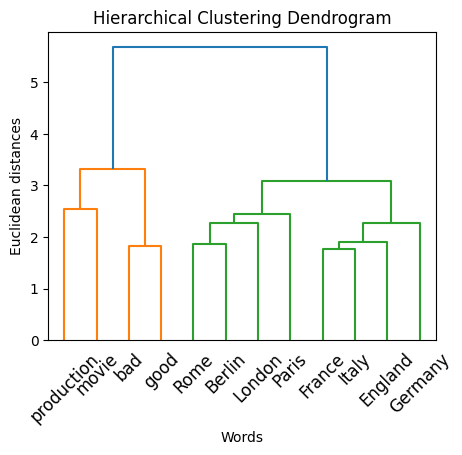

In [15]:
# Entire set of words in the model
all_words = list(model.wv.index_to_key)
all_vectors = np.array([model.wv[word] for word in all_words])

# Highlighted words and their vectors
highlight_words = ['Berlin', 'Paris', 'London','Rome', 'Italy',
                   'France', 'Germany', 'England', 'movie', 'production', 'good', 'bad']
highs = [w.lower() for w in highlight_words]
indices = [all_words.index(word) for word in highs if word in all_words]
highlight_vectors = np.array([all_vectors[index] for index in indices])

linked = linkage(highlight_vectors, 'ward')

plt.figure(figsize=(5, 4))
dendrogram(linked,
           orientation='top',
           labels=highlight_words,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Words')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=45)
plt.savefig('word_dendrogram.jpg', format='jpeg', bbox_inches='tight')
plt.show()

In [16]:
# Apply t-SNE to the entire set of vectors
tsne = TSNE(n_components=2, random_state=0)
Y_tsne = tsne.fit_transform(all_vectors)

highlight_words = ['berlin', 'rome', 'London', 'France', 'Germany',
                    'movie', 'production', 'mother', 'family']

highs = [w.lower() for w in highlight_words]
indices = [all_words.index(word) for word in highs if word in all_words]
highlight_vectors = np.array([all_vectors[index] for index in indices])
Y_highlight = Y_tsne[indices]


plt.figure(figsize=(10, 7))


sns.scatterplot(x=Y_tsne[:, 0], y=Y_tsne[:, 1], color="lightgrey", alpha=0.3)

# Plot highlighted words
palette = sns.color_palette("hsv", len(highlight_words))
texts = []
for i, word in enumerate(highlight_words):
    plt.scatter(Y_highlight[i, 0], Y_highlight[i, 1], color=palette[i], s=100, label=word)
    # adjust text
    texts.append(plt.text(Y_highlight[i, 0], Y_highlight[i, 1], word, fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('t-SNE visualization of Word2Vec embeddings', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')


plt.grid(True)
plt.legend(title='Highlighted Words', title_fontsize='13', fontsize='11')
plt.savefig('word_tsne.jpg', format='jpeg')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Apply UMAP to the entire set of vectors
umap = UMAP(n_components=2, random_state=42)
Y_umap = umap.fit_transform(all_vectors)

Y_highlight = Y_umap[indices]


plt.figure(figsize=(10, 7))
sns.scatterplot(x=Y_umap[:, 0], y=Y_umap[:, 1], color="lightgrey", alpha=0.3)

palette = sns.color_palette("hsv", len(highlight_words))
texts = []
for i, word in enumerate(highlight_words):
    plt.scatter(Y_highlight[i, 0], Y_highlight[i, 1], color=palette[i], s=100, label=word)

    texts.append(plt.text(Y_highlight[i, 0], Y_highlight[i, 1], word, fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('UMAP visualization of Word2Vec embeddings', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')


plt.grid(True)
plt.legend(title='Highlighted Words', title_fontsize='13', fontsize='11')
plt.savefig('word_umap.jpg', format='jpeg')
plt.show()

In [ ]:
def plot_vectors_and_angle(v1, v2):

    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cosine_similarity = dot_product / (norm_v1 * norm_v2)
    angle_radians = np.arccos(cosine_similarity)
    angle_degrees = np.degrees(angle_radians)


    fig, ax = plt.subplots(figsize=(5, 5))


    ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label=f"Vector 1: {v1}")
    ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label=f"Vector 2: {v2}")


    start_angle = np.arctan2(v1[1], v1[0])
    if np.cross(v1, v2) < 0:
        angle_radians = -angle_radians


    theta = np.linspace(start_angle, start_angle + angle_radians, 100)
    r = 0.5 * min(np.linalg.norm(v1), np.linalg.norm(v2))
    x = r * np.cos(theta)
    y = r * np.sin(theta)


    ax.plot(x, y, linestyle='-', color='green', lw=2)


    midpoint = (start_angle + angle_radians / 2)
    ax.annotate(r'$\theta$', xy=(r * np.cos(midpoint), r * np.sin(midpoint)), xytext=(20, 10),
                textcoords='offset points', fontsize=16, arrowprops=dict(arrowstyle='->', lw=0.5))


    max_range = np.max(np.abs(np.vstack([v1, v2, [x.max(), y.max()]]))) * 1.1  # 10% padding
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])


    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f'Angle between vectors: {angle_degrees:.2f} degrees')
    plt.suptitle(f'Similarity between vectors: {cosine_similarity:.2f}', fontsize=10, y=.95)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(loc='lower right')
    plt.savefig('cosine_similarity.jpg', format='jpeg', bbox_inches='tight')
    plt.show()

    return cosine_similarity, angle_degrees

# Example usage
v1 = np.array([2, 3])
v2 = np.array([-1, 2])
cos_sim, angle = plot_vectors_and_angle(v1, v2)



In [ ]:
word_1 = "good"
syn = "great"
ant = "bad"
most_sim =model.wv.most_similar("good")
print("Top 3 most simalr words to {} are :{}".format(word_1, most_sim[:3]))

synonyms_dist = model.wv.distance(word_1, syn)
antonyms_dist = model.wv.distance(word_1, ant)
print("Synonyms {}, {} have cosine distance: {}".format(word_1, syn, synonyms_dist))
print("Antonyms {}, {} have cosine distance: {}".format(word_1, ant, antonyms_dist))
a = 'king'
a_star = 'man'
b = 'woman'
b_star= model.wv.most_similar(positive=[a, b], negative=[a_star])
print("{} is to {} as {} is to: {} ".format(a, a_star, b, b_star[0][0]))

# RNN, LSTM, GRU, CNN for text

In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
array = np.random.random((10, 5, 3))

data_tensor = torch.tensor(array, dtype=torch.float32)
RNN = nn.RNN(input_size=3, hidden_size=10,
                          num_layers=1, batch_first=True)
output, hidden = RNN(data_tensor)
output.shape

In [ ]:
data_tensor = torch.tensor(np.random.random((10, 5, 3)), dtype=torch.float32)
LSTM =nn.LSTM(input_size=3, hidden_size=10,
                    num_layers=1, batch_first=True)
output, (hidden, cell) = LSTM(data_tensor)
output.shape

In [ ]:
data_tensor = torch.tensor(np.random.random((10, 5, 3)), dtype=torch.float32)
GRU =nn.GRU(input_size=3, hidden_size=10,
                    num_layers=1, batch_first=True)
output, hidden = GRU(data_tensor)
output.shape

In [ ]:
data_tensor = torch.tensor(np.random.random((10, 5, 3)), dtype=torch.float32)
Conv1d = nn.Conv1d(in_channels=5, out_channels=16, kernel_size=3, stride=1, padding=1)
output = Conv1d(data_tensor)
output.shape

# Classify review with deep learning

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import sys
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from wordcloud import WordCloud

is_cuda = torch.cuda.is_available()

# Check if we GPU available
if is_cuda:
    device = torch.device("cuda")
    print("Using GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

In [ ]:
#this for unzip and read the file
try:
    df=pd.read_csv("IMDB Dataset.csv")
except:
    !wget https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
    !unzip IMDB.zip?raw=true

df['sentiment_encoded'] = np.where(df['sentiment']=='positive',0,1)
X,y = df['review'].values, df['sentiment_encoded'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, test_size=.2)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,stratify=y_train, test_size=.1)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

In [ ]:
def generate_wordclouds(df):
    '''
    Generate two word clouds from the 50 most frequent words in the list of positive and negative reviews respectively.

    '''
    stop_words = set(stopwords.words('english'))

    # Separating reviews by sentiment
    positive_reviews = df[df['sentiment'] == 'positive']['review']
    negative_reviews = df[df['sentiment'] == 'negative']['review']


    def get_words(reviews):
        all_words = []
        for review in reviews:
            review = re.sub(r"[^\w\s]", '', review)
            review = re.sub(r"\d", '', review)
            words = review.split()
            filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
            all_words.extend(filtered_words)
        return all_words


    positive_words = get_words(positive_reviews)
    negative_words = get_words(negative_reviews)


    positive_counts = Counter(positive_words)
    negative_counts = Counter(negative_words)


    positive_wordcloud = WordCloud(
        width=400,
        height=400,
        max_words=200,
        max_font_size=100,
        background_color='white',
        color_func=lambda *args, **kwargs: "green"
    ).generate_from_frequencies(positive_counts)

    negative_wordcloud = WordCloud(
        width=400,
        height=400,
        max_words=200,
        max_font_size=100,
        background_color='white',
        color_func=lambda *args, **kwargs: "red"
    ).generate_from_frequencies(negative_counts)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Positive Reviews')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Negative Reviews')
    plt.axis("off")
    plt.savefig('word_clouds.jpg', format='jpeg', bbox_inches='tight')
    plt.show()

generate_wordclouds(df)


In [ ]:
def plot_review_length_by_sentiment(df):
    '''
    Plots histograms of the number of words per review for positive and negative reviews with summary statistics.

    '''

    positive_reviews = df[df['sentiment'] == 'positive']['review']
    negative_reviews = df[df['sentiment'] == 'negative']['review']


    def get_review_lengths(reviews):
        return [len(review.split()) for review in reviews]


    positive_lengths = get_review_lengths(positive_reviews)
    negative_lengths = get_review_lengths(negative_reviews)


    def get_summary_stats(lengths):
        return {
            'min': np.min(lengths),
            'avg': np.mean(lengths),
            'median': np.median(lengths),
            'max': np.max(lengths)
        }

    pos_stats = get_summary_stats(positive_lengths)
    neg_stats = get_summary_stats(negative_lengths)


    plt.figure(figsize=(12, 6))

    # Plot for positive reviews
    plt.subplot(1, 2, 1)
    plt.hist(positive_lengths, bins=30, color='green', edgecolor='black', alpha=0.7)
    plt.title('Word Distribution for Positive Reviews')
    plt.xlabel('Number of Words')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    stats_text = f"Min: {pos_stats['min']}\nAvg: {pos_stats['avg']:.2f}\nMedian: {pos_stats['median']}\nMax: {pos_stats['max']}"
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.5))

    # Plot for negative reviews
    plt.subplot(1, 2, 2)
    plt.hist(negative_lengths, bins=30, color='red', edgecolor='black', alpha=0.7)
    plt.title('Word Distribution for Negative Reviews')
    plt.xlabel('Number of Words')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    stats_text = f"Min: {neg_stats['min']}\nAvg: {neg_stats['avg']:.2f}\nMedian: {neg_stats['median']}\nMax: {neg_stats['max']}"
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.savefig('review_length.jpg', format='jpeg', bbox_inches='tight')
    plt.show()

plot_review_length_by_sentiment(df)

In [ ]:
def preprocess_review(review):
    '''
    Cleaning of the review: remove non-alphanumeric characters, collapse whitespace, and remove digits.
    '''
    review = re.sub(r"[^\w\s]", ' ', review)  # Replace non-word characters with space
    review = re.sub(r"\s+", ' ', review)      # Replace multiple spaces with a single space
    review = re.sub(r"\d", '', review)        # Remove digits
    return review.strip().lower()

def tokenize_reviews(x_train, x_val, x_test):
    stop_words = set(stopwords.words('english'))

    # tokenize and clean list of reviews
    def tokenize_and_filter(reviews):
        word_list = []
        for review in reviews:
            words = word_tokenize(preprocess_review(review))
            filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
            word_list.extend(filtered_words)
        return word_list

    # Create a corpus
    corpus = Counter(tokenize_and_filter(x_train))
    # Select the 1000 most common words
    vocab = {word: i+1 for i, word in enumerate([word for word, freq in corpus.most_common(1000)])}

    # convert reviews into sequences of indices
    def vectorize_reviews(reviews):
        vectorized = []
        for review in reviews:
            tokenized = word_tokenize(preprocess_review(review))
            indexed = [vocab[word] for word in tokenized if word in vocab]
            vectorized.append(indexed)
        return vectorized

    _x_train = vectorize_reviews(x_train)
    _x_val = vectorize_reviews(x_val)
    _x_test = vectorize_reviews(x_test)

    return _x_train, _x_val, _x_test, vocab


x_train, x_val, x_test, vocab = tokenize_reviews(x_train, x_val, x_test)


In [ ]:
def plot_review_length_distribution(tokenized_reviews):
    '''
    Plots a histogram of the lengths of tokenized reviews and includes a box with summary statistics.

    '''

    review_lengths = [len(review) for review in tokenized_reviews]

    # Calculate summary statistics
    min_length = np.min(review_lengths)
    avg_length = np.mean(review_lengths)
    median_length = np.median(review_lengths)
    max_length = np.max(review_lengths)


    plt.figure(figsize=(10, 6))
    plt.hist(review_lengths, bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.grid(True)


    stats_text = f'Min Length: {min_length}\nAverage Length: {avg_length:.2f}\nMedian Length: {median_length}\nMax Length: {max_length}'
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.5))
    plt.savefig('review_length_after_tokenization.jpg', format='jpeg', bbox_inches='tight')
    plt.show()

plot_review_length_distribution(x_train)

In [ ]:
def padding_(reviews, max_seq):
    features = np.zeros((len(reviews), max_seq),dtype=int)
    for ii, review in enumerate(reviews):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:max_seq]
    return np.array(features)

train_data = TensorDataset(torch.from_numpy(padding_(x_train,500)), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(padding_(x_val,500)), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(padding_(x_test,500)), torch.from_numpy(y_test))

train_loader = DataLoader(train_data, shuffle=True, batch_size=50)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=50)
test_loader = DataLoader(test_data, shuffle=True, batch_size=50)

In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5):
        super(SentimentRNN, self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers
        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(input_size=embedding_dim, hidden_size=self.hidden_dim,
                          num_layers=no_layers, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        batch_size = x.size(0)
        embeds = self.embedding(x)
        rnn_out, hidden = self.rnn(embeds, hidden)
        rnn_out = rnn_out.contiguous().view(-1, self.hidden_dim)
        out = self.dropout(rnn_out)
        sig_out = self.sig(out)
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]
        return sig_out, hidden

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''

        h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        return h0

# Hyperparameters
no_layers = 3
vocab_size = len(vocab) + 1
embedding_dim = 300
output_dim = 1
hidden_dim = 256

# Initialize the model
model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(model)


In [ ]:
x_train_tsne = padding_(x_train,500)
x_train_tsne = x_train_tsne[:1000,:]
y_train_tsne= y_train[:1000]

def plot_embeddings(x_train, y_train, model, device, batch_size=50):
    model.eval()
    embeddings_list = []

    # Create a DataLoader to handle the x_train data in batches
    train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_train),
                               torch.from_numpy(y_train))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():  # No need to track gradients
        for x_batch, _ in train_loader:
            x_batch = x_batch.to(device)
            hidden = model.init_hidden(x_batch.size(0))

            # Feed forward through the model to get to the embeddings layer
            embeds = model.embedding(x_batch)
            rnn_out, hidden = model.rnn(embeds, hidden)
            rnn_out = rnn_out.contiguous().view(-1, model.hidden_dim)  # Flatten the output
            out = model.dropout(rnn_out)
            linear_output = model.fc(out)

            embeddings_list.append(linear_output.cpu())  # Store CPU data

    # Concatenate all batch embeddings into a single matrix
    all_embeddings = torch.cat(embeddings_list, dim=0)

    all_embeddings = all_embeddings.view(-1, 500)

    # Reduce dimensions to 2D using t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(all_embeddings.numpy())

    df = pd.DataFrame(data=embeddings_2d, columns=['TSNE-1', 'TSNE-2'])
    df['label'] = y_train
    custom_palette = {0: 'green', 1: 'red'}

    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(data=df, x='TSNE-1', y='TSNE-2', hue='label', palette=custom_palette , s=60, alpha=0.6)
    plt.title('2D t-SNE Visualization of Sentence Embeddings')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc=2)
    plt.savefig('tsne_model_untrained_projection.jpg', format='jpeg', bbox_inches='tight')
    plt.show()


plot_embeddings(x_train_tsne, y_train_tsne, model, device, batch_size=50)


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


lr = 0.001

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

def acc(pred, label):
    """Calculate accuracy by comparing predicted labels with true labels."""
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

clip = 5
epochs = 5
valid_loss_min = np.inf


epoch_tr_loss, epoch_vl_loss = [], []
epoch_tr_acc, epoch_vl_acc = [], []


for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()  # Set model to training mode

    # Initialize hidden state
    h = model.init_hidden(50)

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Detach hidden states
        h = h.data

        model.zero_grad()
        output, h = model(inputs, h)

        # Calculate the loss
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())

        # Calculate accuracy
        accuracy = acc(output, labels)
        train_acc += accuracy

        # Clip gradients to prevent exploding gradient issues in RNNs
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

    # Validation phase
    val_losses = []
    val_acc = 0.0
    model.eval()  # Set model to evaluation mode
    val_h = model.init_hidden(50)

    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Detach hidden states
        val_h = val_h.data

        output, val_h = model(inputs, val_h)
        val_loss = criterion(output.squeeze(), labels.float())

        val_losses.append(val_loss.item())

        accuracy = acc(output, labels)
        val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc / len(train_loader.dataset)
    epoch_val_acc = val_acc / len(valid_loader.dataset)

    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)

    print(f'Epoch {epoch+1}')
    print(f'Train Loss: {epoch_train_loss} Val Loss: {epoch_val_loss}')
    print(f'Train Accuracy: {epoch_train_acc * 100}% Val Accuracy: {epoch_val_acc * 100}%')
    print(' ')



In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.savefig('accuracy_and_loss.jpg', format='jpeg', bbox_inches='tight')
plt.show()

In [ ]:
def predict_batch(model, data_loader, device):
    """Predict output for a batch of data using the RNN model."""
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            batch_size = inputs.size(0)

            hidden = model.init_hidden(batch_size).to(device)

            output, _ = model(inputs, hidden)

            predicted_probs = torch.sigmoid(output)
            predicted_labels = (predicted_probs > 0.60).float()

            predictions.extend(predicted_labels.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels, predicted_probs, labels


predictions, true_labels, predicted_probs, labels = predict_batch(model, test_loader, device)
print(f'Accuracy on test set: {accuracy_score(true_labels, predictions)}')
# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg', format='jpeg', bbox_inches='tight')
plt.show()

In [ ]:
plot_embeddings(x_train_tsne, y_train_tsne, model, device, batch_size=50)